Este código usa la librería kagglehub para descargar automáticamente el dataset de **Netflix** desde **Kaggle** a mi entorno de trabajo y guardar la ruta donde se almacenaron los archivos para poder cargarlos luego con pandas

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shivamb/netflix-shows")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'netflix-shows' dataset.
Path to dataset files: /kaggle/input/netflix-shows


Aquí uso pandas para leer el archivo ***netflix_titles.csv*** que descargué y lo cargo en un DataFrame llamado df, lo que me permite empezar a explorar y analizar los datos ***df.head()*** me muestra las primeras filas para verificar que se cargó correctamente

In [ ]:
import pandas as pd

# Reemplaza con tu path real
df = pd.read_csv(path + "/netflix_titles.csv")

df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# **Me muestra la cantidad de filas y columnas del dataset**

In [ ]:
df.shape


(8807, 12)

# **Me permite ver los nombres de todas las columnas**

In [ ]:
df.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# **Me da un resumen del tipo de datos, valores nulos y estructura general del DataFrame para entender cómo vienen los datos antes de analizarlos**

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# **¿Cuántas películas y cuántas series hay?**

In [ ]:
df['type'].value_counts()


,count
type,
Movie,6131
TV Show,2676


# **¿Cuáles son los 10 países con más contenido en Netflix?**

In [ ]:
df['country'].value_counts().head(10)


,count
country,
United States,2818
India,972
United Kingdom,419
Japan,245
South Korea,199
Canada,181
Spain,145
France,124
Mexico,110


# **¿En qué años Netflix agregó más contenido?**

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')
df['year_added'] = df['date_added'].dt.year.astype('Int64')

df['year_added'].value_counts().sort_index()


,count
year_added,
2008,2
2009,2
2010,1
2011,13
2012,3
2013,11
2014,24
2015,82
2016,429


# **Duración promedio de películas**

In [ ]:
movies = df[df['type'] == 'Movie'].copy()

movies['minutes'] = (
    movies['duration']
    .str.extract(r'(\d+)')[0]
    .astype('Int64')
)

movies['minutes'].mean()


np.float64(99.57718668407311)

# **¿Qué géneros son los más producidos?**

In [ ]:
df['listed_in'].str.split(', ').explode().value_counts().head(10)


,count
listed_in,
International Movies,2752
Dramas,2427
Comedies,1674
International TV Shows,1351
Documentaries,869
Action & Adventure,859
TV Dramas,763
Independent Movies,756
Children & Family Movies,641


# **¿Qué país produce más series vs más películas?**

In [ ]:
df.groupby(['country', 'type']).size().unstack().sort_values(by='Movie', ascending=False).head(10)


type,Movie,TV Show
country,,
United States,2058.0,760.0
India,893.0,79.0
United Kingdom,206.0,213.0
Canada,122.0,59.0
Spain,97.0,48.0
Egypt,92.0,14.0
Nigeria,86.0,9.0
Indonesia,77.0,2.0
Japan,76.0,169.0


# **¿Desde qué año Netflix empezó a crecer agresivamente en contenido?**

<Axes: xlabel='year_added'>

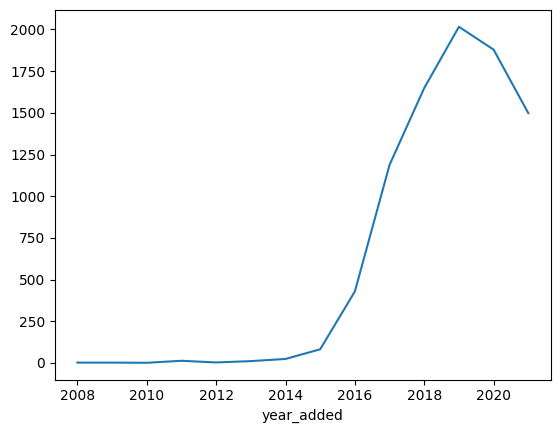

In [ ]:
df['year_added'].value_counts().sort_index().plot()
